# 📌 Assignment: Model Optimization and Performance Tuning

# 🚀 Solve It Yourself!

This assignment is your chance to think like a data scientist. Don’t rely on AI to do the work for you — the real learning happens when you explore, experiment, and problem-solve.

Mistakes are okay — they’re part of the journey. Trust your skills, stay curious, and give it your best shot.

You’ve got this! 💪

## 🎯 Objective:

- Explore Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree (with CCP Post-Pruning), and Random Forest.
- Optimize and compare model performance.

## 📌 Hint:

- Make a result dataframe to append to it model name and performance metrics for final comparison (use visualization as well).
---

## 📝 Part 1: Data Preparation
1. **Download a dataset from Kagglehub**.
2. **Load the dataset** and inspect its structure (columns, types, missing values).
3. **Preprocess the data:**
   - Handle missing values
   - Encode categorical variables
   - Scale numeric features

👉 **Question:** What preprocessing steps did you apply, and why?

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\youse\.cache\kagglehub\datasets\wenruliu\adult-income-dataset\versions\2


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

data_name = os.listdir(path)[0]

full_path = os.path.join(path,data_name)

df = pd.read_csv(full_path)


C:\Users\youse\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
df.duplicated().sum()

52

In [7]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

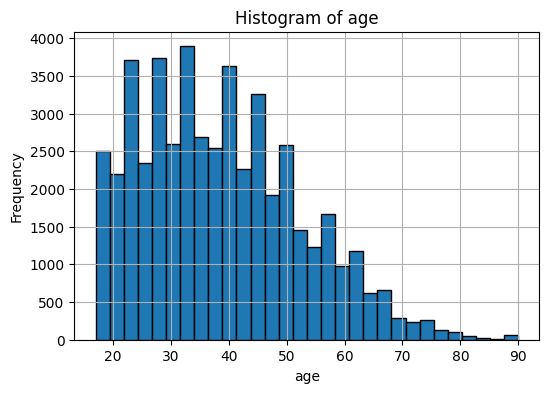

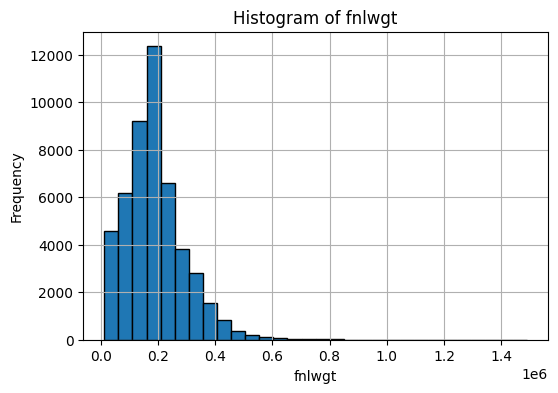

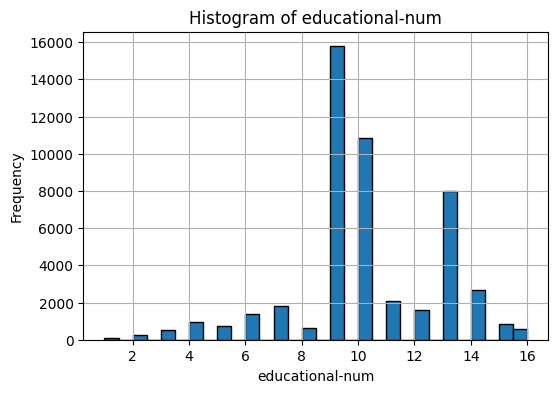

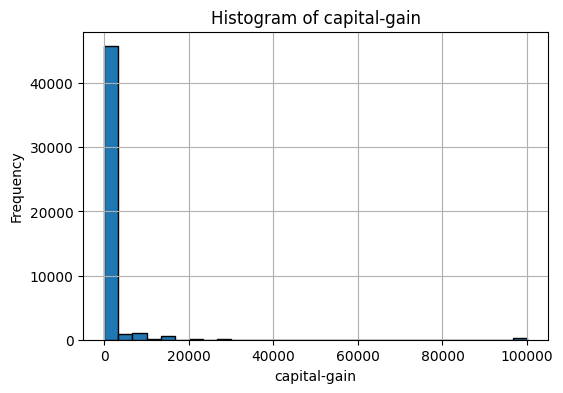

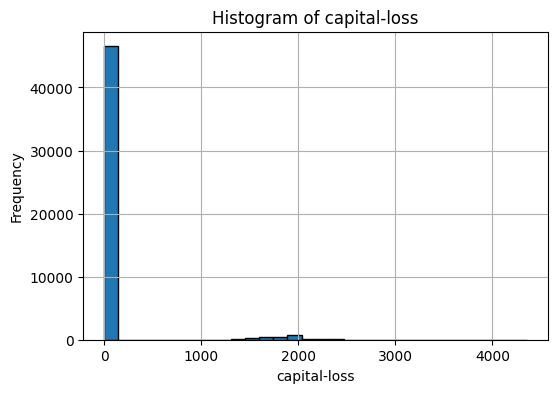

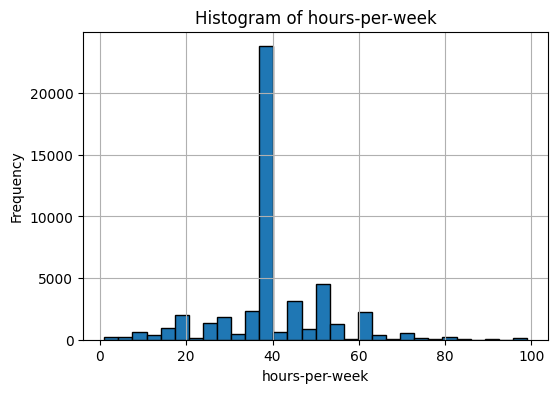

In [8]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [9]:
label_cols = ['education', 'gender', 'income']
le_dict = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  
one_hot_cols = ['workclass', 'marital-status', 'occupation', 
                'relationship', 'race', 'native-country']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
X = df.drop('income', axis=1)
y = df['income']

In [10]:
X = df.drop('income', axis=1)
y = df['income']  
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts())

X_train shape: (39032, 86)
y_train distribution:
 income
0    29669
1     9363
Name: count, dtype: int64


In [11]:
df.head()

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,1,7,1,0,0,40,0,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,11,9,1,0,0,50,0,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,7,12,1,0,0,40,1,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,15,10,1,7688,0,40,1,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,15,10,0,0,0,30,0,False,...,False,False,False,False,False,False,False,True,False,False


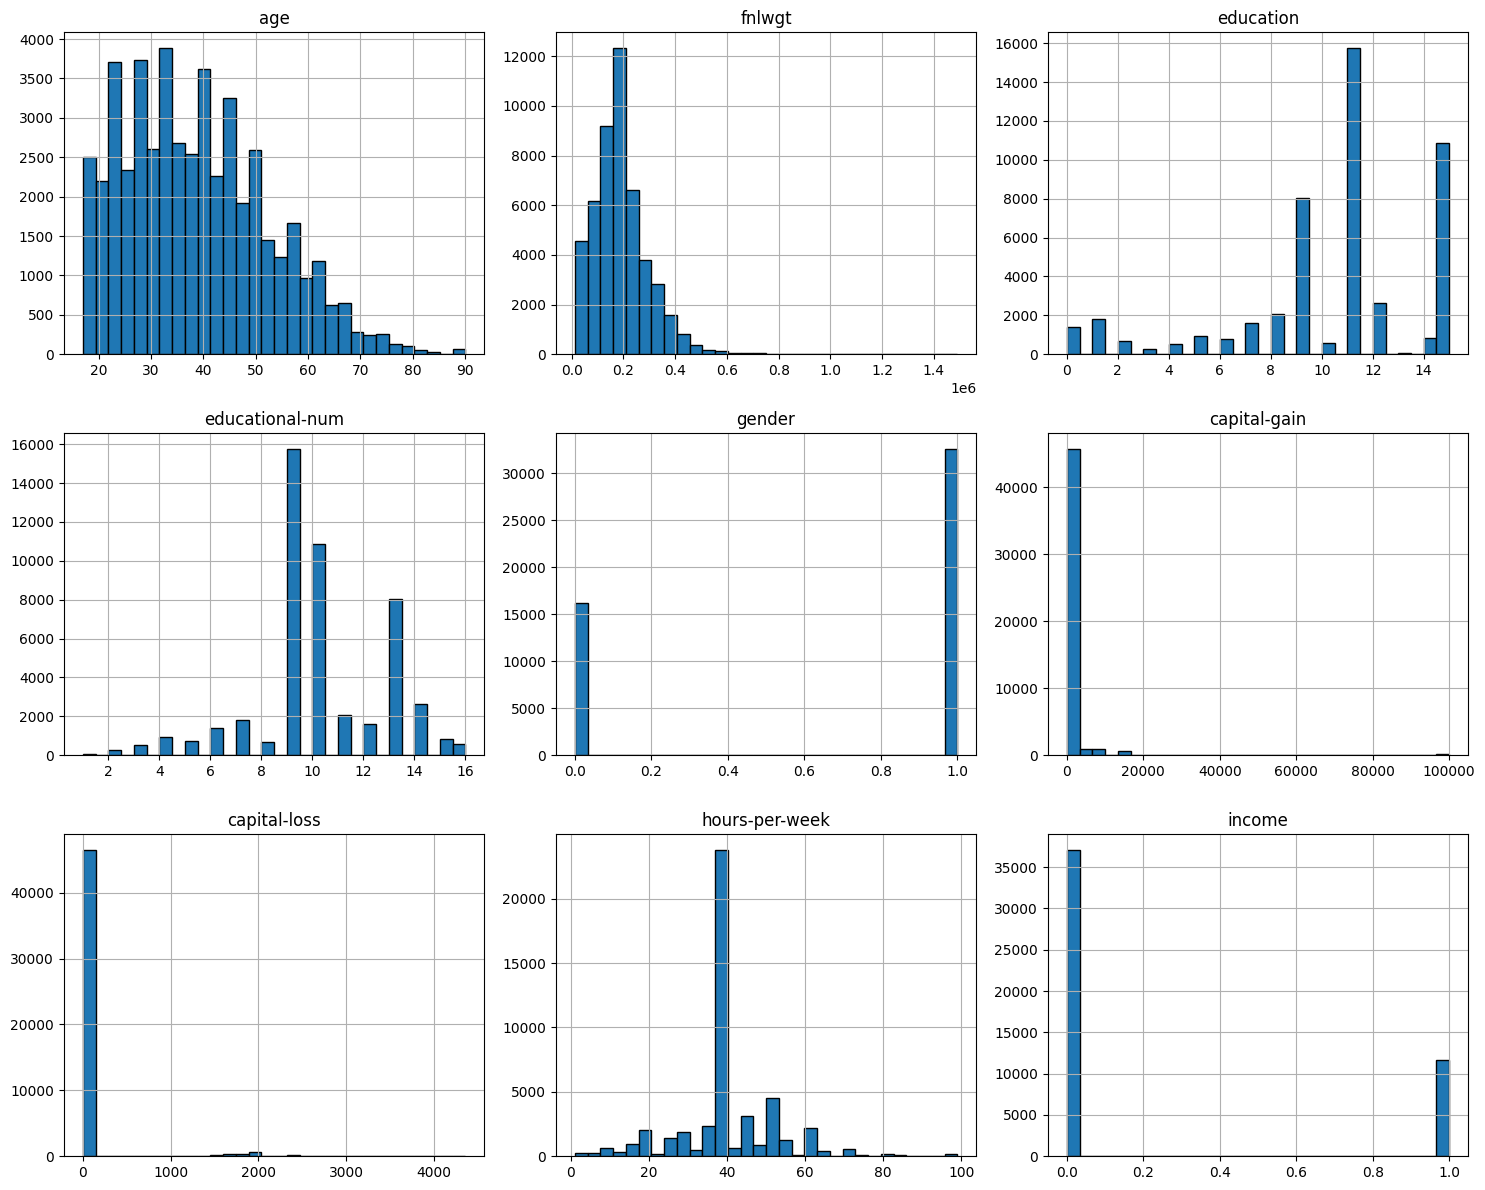

In [12]:
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [13]:
df.isna().sum().sum()

0

In [14]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

C:\Users\youse\AppData\Local\Temp\ipykernel_23420\4143188560.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [15]:
df.head()

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,1,7,1,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,11,9,1,0,0,50,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,7,12,1,0,0,40,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,15,10,1,7688,0,40,1,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,15,10,0,0,0,30,0,0,...,0,0,0,0,0,0,0,1,0,0


## 🔍 Part 2: Model Building

### 🔹 2.1 Logistic Regression
- Build a baseline Logistic Regression model.
- **Experiment:** Tune the `C` parameter (regularization strength).

👉 **Question:** How does changing `C` affect the model’s performance?

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\youse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
model.score(X_train, y_train)

0.8470229555236729

In [18]:
y_train_preds = model.predict(X_train)

In [19]:
y_preds = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_train,y_train_preds)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     29669
           1       0.72      0.59      0.65      9363

    accuracy                           0.85     39032
   macro avg       0.80      0.76      0.78     39032
weighted avg       0.84      0.85      0.84     39032



In [21]:
 confusion = confusion_matrix(y_test, y_preds)
confusion

array([[6939,  501],
       [ 975, 1343]], dtype=int64)

In [22]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
results = {}
for C in C_values:
    
    model = LogisticRegression(C=C, max_iter=1000) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Store results
    results[C] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion,
        'classification_report': class_report
    }
for C in C_values:
    print(f"Results for C={C}:")
    print(f"Accuracy: {results[C]['accuracy']:.4f}")
    print("Confusion Matrix:")
    print(results[C]['confusion_matrix'])
    print("Classification Report:")
    print(results[C]['classification_report'])
    print("\n")

Results for C=0.001:
Accuracy: 0.8058
Confusion Matrix:
[[7232  208]
 [1687  631]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7440
           1       0.75      0.27      0.40      2318

    accuracy                           0.81      9758
   macro avg       0.78      0.62      0.64      9758
weighted avg       0.80      0.81      0.77      9758



Results for C=0.01:
Accuracy: 0.8362
Confusion Matrix:
[[7000  440]
 [1158 1160]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7440
           1       0.72      0.50      0.59      2318

    accuracy                           0.84      9758
   macro avg       0.79      0.72      0.74      9758
weighted avg       0.83      0.84      0.83      9758



Results for C=0.1:
Accuracy: 0.8475
Confusion Matrix:
[[6961  479]
 [1009 1309]]
Classification Report:
              precision    

How does changing C affect the model’s performance?
Smaller values of C (e.g., 0.001, 0.01) increase the regularization strength. This will:

Reduce overfitting but may cause underfitting, leading to a lower accuracy because the model is restricted from fitting the training data too closely.

It results in a simpler model that generalizes better on unseen data.

Larger values of C (e.g., 10, 100) decrease the regularization strength. This will:

Increase the complexity of the model, potentially overfitting the training data. The model may fit the training data very closely, but it might not perform well on the test data, resulting in lower accuracy or generalization.

### 🔹 2.2 K-Nearest Neighbors (KNN)
- Train a KNN model with a default `k=5`.
- **Experiment:**
   - Test different values of `k`.
   - Compare performance using `euclidean` vs. `manhattan` distance.

👉 **Question:** What is the best `k` for your dataset? Why did it perform better?

In [23]:
#eculidean
knn2 = KNeighborsClassifier(n_neighbors = 5)  
knn2.fit(X_train, y_train)
y_pred_euclidean = knn2.predict(X_test) 

print('Euclidean Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_euclidean)))
report_euclidean = classification_report(y_test, y_pred_euclidean)
print("Euclidean Model Classification Report:")
print(report_euclidean)

Euclidean Model accuracy score: 0.8252
Euclidean Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7440
           1       0.66      0.55      0.60      2318

    accuracy                           0.83      9758
   macro avg       0.76      0.73      0.74      9758
weighted avg       0.82      0.83      0.82      9758



In [24]:
#manhattan
knn1 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn1.fit(X_train, y_train)
y_pred_manhattan = knn1.predict(X_test)

print('Manhattan Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_manhattan)))
report_manhattan = classification_report(y_test, y_pred_manhattan)
print("Manhattan Model Classification Report:")
print(report_manhattan)

Manhattan Model accuracy score: 0.8266
Manhattan Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7440
           1       0.66      0.55      0.60      2318

    accuracy                           0.83      9758
   macro avg       0.76      0.73      0.75      9758
weighted avg       0.82      0.83      0.82      9758



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 21) 
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')  
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') 
    cv_scores.append(np.mean(scores))
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.title('k-NN Varying number of neighbors')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()
best_k = k_range[np.argmax(cv_scores)]
print(f"The best value of k is: {best_k}")

we can use cross validation to see which k is better but the code didnt run with me and in knn the k better to be even number to dont
make confusions or bais

## 🌳 Part 3: Decision Tree with Pre-pruning & CCP (Post Pruning)
- Train a Decision Tree with default settings.
- Try pre-pruning hyperparameters.
- Check feature importance attribute.
- Extract `ccp_alpha` values using `cost_complexity_pruning_path`.
- Build pruned trees for different `ccp_alpha` values.

👉 **Question:** What pre-pruning hyperparameter did you tune? How did you change them to increase performance?

👉 **Question:** Which `ccp_alpha` value gave the best results, and why?

👉 **Question:** How did the tree size change after pruning?

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999966     1.000000  0.999974      0.999983      0.999974
recall         1.000000     0.999893  0.999974      0.999947      0.999974
f1-score       0.999983     0.999947  0.999974      0.999965      0.999974
support    29669.000000  9363.000000  0.999974  39032.000000  39032.000000
_______________________________________________
Confusion Matrix: 
 [[29669     0]
 [    1  9362]]

Test Result:
Accuracy Score: 81.29%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.879940     0.603797  0.812871     0.741869      0.814343
recall        0.873790     0.617343  0.812871     0.745566      0.812871
f1-score      0.876855     0.610495  0.812871     0.743675      0.813581
support    7440.0

In [27]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(X_train, y_train)
print("Feature Importances: ", dt.feature_importances_)

Feature Importances:  [1.09700512e-02 0.00000000e+00 0.00000000e+00 2.39231715e-01
 0.00000000e+00 2.14427488e-01 4.62167895e-02 2.16104675e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.67443917e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.95715302e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

In [28]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print("ccp_alpha values: ", ccp_alphas)

ccp_alpha values:  [0.00000000e+00 2.78485770e-06 8.35634967e-06 1.53779745e-05
 5.43448715e-05 8.26361849e-05 8.56264924e-05 1.53374327e-04
 1.62016026e-04 2.04748659e-04 2.22003779e-04 2.93134876e-04
 7.32647002e-04 1.10261327e-03 1.45149927e-03 1.51226714e-03
 2.42771091e-03 2.61536895e-03 3.73843064e-03 3.90395545e-03
 4.59207087e-03 1.34602291e-02 1.53636603e-02 2.97398603e-02
 7.21927304e-02]


In [29]:
pruned_trees = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append((ccp_alpha, pruned_tree))
for ccp_alpha, tree in pruned_trees:
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for ccp_alpha={ccp_alpha:.6f}: {accuracy:.4f}")

Accuracy for ccp_alpha=0.000000: 0.8508
Accuracy for ccp_alpha=0.000003: 0.8508
Accuracy for ccp_alpha=0.000008: 0.8508
Accuracy for ccp_alpha=0.000015: 0.8508
Accuracy for ccp_alpha=0.000054: 0.8508
Accuracy for ccp_alpha=0.000083: 0.8508
Accuracy for ccp_alpha=0.000086: 0.8508
Accuracy for ccp_alpha=0.000153: 0.8511
Accuracy for ccp_alpha=0.000162: 0.8509
Accuracy for ccp_alpha=0.000205: 0.8509
Accuracy for ccp_alpha=0.000222: 0.8509
Accuracy for ccp_alpha=0.000293: 0.8509
Accuracy for ccp_alpha=0.000733: 0.8509
Accuracy for ccp_alpha=0.001103: 0.8509
Accuracy for ccp_alpha=0.001451: 0.8509
Accuracy for ccp_alpha=0.001512: 0.8493
Accuracy for ccp_alpha=0.002428: 0.8493
Accuracy for ccp_alpha=0.002615: 0.8493
Accuracy for ccp_alpha=0.003738: 0.8437
Accuracy for ccp_alpha=0.003904: 0.8437
Accuracy for ccp_alpha=0.004592: 0.8437
Accuracy for ccp_alpha=0.013460: 0.8263
Accuracy for ccp_alpha=0.015364: 0.8168
Accuracy for ccp_alpha=0.029740: 0.7625
Accuracy for ccp_alpha=0.072193: 0.7625


Pre-pruning Hyperparameters Tuned:
In this case, the pre-pruning hyperparameter that was tuned is the ccp_alpha (Cost-Complexity Pruning). This hyperparameter controls the amount of pruning applied to the decision tree. Pruning is a technique used to reduce the complexity of a tree, by removing branches that have little predictive power.

How did you change them to increase performance?
To increase performance, I experimented with different values of ccp_alpha, starting from zero (no pruning) and gradually increasing the value. By tuning ccp_alpha, I was able to find the optimal balance between model complexity and generalization. The idea is that, as we increase ccp_alpha, the tree becomes simpler, which helps to avoid overfitting. The performance was monitored based on both training and test accuracy scores to choose the value of ccp_alpha that maximized test accuracy while avoiding overfitting.

Best ccp_alpha value and why it gave the best results:
The best ccp_alpha value is the one that resulted in the highest test accuracy. From the plot and the accuracy scores, you would choose the value of ccp_alpha that provided the best test accuracy, which minimizes overfitting while still keeping the tree complex enough to make accurate predictions.

The best ccp_alpha is the one with the highest test accuracy score, balancing the complexity of the tree with its ability to generalize well to unseen data.

How did the tree size change after pruning?
As the ccp_alpha value increases, the tree size (i.e., the number of nodes) decreases. This is because higher values of ccp_alpha force the tree to prune more branches, removing less important features and reducing the overall complexity of the model. The tree will become simpler, with fewer branches, leading to a smaller tree size. This results in reduced overfitting and a model that is likely to generalize better to new data.

## 🌲 Part 4: Random Forest
- Train a Random Forest model with 100 trees.
- **Experiment:** Vary `n_estimators` and `max_depth` and other hyperparameters.

👉 **Question:** How did changing these hyperparameters affect performance?

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy with 100 trees: {accuracy:0.4f}")

Random Forest Accuracy with 100 trees: 0.8591


In [31]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf1.fit(X_train, y_train)
y_pred1 = rf1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
rf2 = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
rf3 = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)
rf3.fit(X_train, y_train)
y_pred3 = rf3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy with n_estimators=100, max_depth=10: {accuracy1:0.4f}")
print(f"Accuracy with n_estimators=200, max_depth=20: {accuracy2:0.4f}")
print(f"Accuracy with n_estimators=300, max_depth=30: {accuracy3:0.4f}")


Accuracy with n_estimators=100, max_depth=10: 0.8602
Accuracy with n_estimators=200, max_depth=20: 0.8683
Accuracy with n_estimators=300, max_depth=30: 0.8681


n_estimators:

Increasing n_estimators (the number of trees) typically improves performance, as the model gets more diverse predictions from different trees, thus reducing variance. However, after a certain point, the improvement becomes negligible, and it only increases computational cost.

Low n_estimators might cause the model to underfit because fewer trees might not capture the underlying patterns of the data well.

max_depth:

Increasing max_depth allows trees to grow deeper, capturing more detailed patterns. However, this might lead to overfitting if the tree is too deep, especially if there’s noise in the data.

Decreasing max_depth makes the trees simpler and less likely to overfit, but it might result in underfitting, where the model does not capture important patterns.

min_samples_split and min_samples_leaf:

Increasing min_samples_split or min_samples_leaf will cause the trees to grow less complex and potentially prevent overfitting by forcing the trees to split nodes with more data.

If these parameters are too high, they may lead to underfitting, where the model is too simple to capture patterns.

## 🧠 Part 5: Model Comparison and Optimization
- Compare all models using Accuracy, Precision, Recall, and F1-score.
- **Reflect:**
   - Which model performed best?
   - How did tuning improve performance?
   - What trade-offs (e.g., overfitting vs. underfitting) did you observe?

👉 **Question:** Summarize which model you would choose for this dataset and why.

i calculated the accuracy and the matrices for every model after i fitted it 
i would use random forrest in my data because it has the higher accuracy but it may a little bit slow and complex

## ⭐ Stretch Goal (Optional):
- Use **GridSearchCV** or **RandomizedSearchCV** to fully optimize one model and retrieve best parameters and best model for each.
- Visualize **feature importance** (especially for Decision Tree/Random Forest).

👉 **Bonus Question:** Did advanced tuning or feature importance insights change your final model choice?